## **DATA PROFICIENCY PROJECT**
## **NAMES:  Ekiru Ernest Ochepa**
## **TRACK:  Data Science**
## **DATE:  17/09/2025**
#

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Importing data

In [2]:
df = pd.read_csv("D:/Local Disk/Everything Data Africa/Assignment/Cohort_4_Capstone_Project.csv")

In [3]:
print(f"rows and columns: {df.shape}")
print("\n")
print(f"Columns: {df.columns}")
print("\n")
print(f"Data Summary: {df.info()}")


rows and columns: (63, 15)


Columns: Index(['Timestamp', 'Id. No', 'Age range', 'Gender', 'Country',
       'Where did you hear about Everything Data?',
       'How many years of learning experience do you have in the field of data?',
       'Which track are you applying for?',
       'How many hours per week can you commit to learning?',
       'What is your main aim for joining the mentorship program?',
       'What is your motivation to join the Everything Data mentorship program?',
       'How best would you describe your skill level in the track you are applying for?',
       'Have you completed the everything data aptitude test for your track?',
       'Total score', 'Graduated'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 15 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                       

**The data comprised of 63 students who enrolled into the Everything Data Africa Mentorship program**

## Checking for duplicates

In [4]:
duplicate_count = df.duplicated(subset=["Id. No"]).sum()
print("Number of duplicate ID's: ", duplicate_count)

Number of duplicate ID's:  0


**There were no duplicate identified**

## Checking missingness

In [5]:
Missing = df.isnull().sum()
print(Missing)

Timestamp                                                                          0
Id. No                                                                             0
Age range                                                                          0
Gender                                                                             0
Country                                                                            0
Where did you hear about Everything Data?                                          0
How many years of learning experience do you have in the field of data?            0
Which track are you applying for?                                                  0
How many hours per week can you commit to learning?                                0
What is your main aim for joining the mentorship program?                          0
What is your motivation to join the Everything Data mentorship program?            0
How best would you describe your skill level in the track you are

**There were no mssing values in our dataset.**

## Renaming the variables

In [6]:
df = df.rename(columns={
    "Timestamp": "timestamp",
    "Id. No.": "id",
    "Age range": "age_range",
    "Gender": "gender",
    "Country": "country",
    "Where did you hear about Everything Data?": "source",
    "How many years of learning experience do you have in the field of data?": "years_experience",
    "Which track are you applying for?": "track",
    "How many hours per week can you commit to learning?": "hours_per_week",
    "What is your main aim for joining the mentorship program?": "main_aim",
    "What is your motivation to join the Everything Data mentorship program?": "motivation",
    "How best would you describe your skill level in the track you are applying for?": "skill_level",
    "Have you completed the everything data aptitude test for your track?": "aptitude_status",
    "Total score": "total_score"
})

print(df.columns)

Index(['timestamp', 'Id. No', 'age_range', 'gender', 'country', 'source',
       'years_experience', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_status', 'total_score', 'Graduated'],
      dtype='object')


## Viewing the data

In [7]:
df.head()

,timestamp,Id. No,age_range,gender,country,source,years_experience,track,hours_per_week,main_aim,motivation,skill_level,aptitude_status,total_score,Graduated
0,12/1/2024 23:50,DS301,18-24 years,Male,Kenya,Word of mouth,Less than six months,Data science,less than 6 hours,Upskill,to enter into the data analysis career,Beginner - I have NO learning or work experien...,Yes,58.67,No
1,12/3/2024 9:35,DS302,25-34 years,Male,Kenya,WhatsApp,6 months - 1 year,Data science,more than 14 hours,Upskill,To grow and improve my skills in data science ...,Elementary - I have theoretical understanding ...,Yes,70.00,No
2,12/3/2024 19:16,DS303,18-24 years,Female,Kenya,WhatsApp,6 months - 1 year,Data science,more than 14 hours,Upskill,I’m motivated to join Everything Data to enhan...,Intermediate - I have theoretical knowledge an...,Yes,64.33,Yes
3,12/3/2024 12:52,DS304,18-24 years,Female,Kenya,WhatsApp,6 months - 1 year,Data science,7-14 hours,Upskill,I'd like to upskill and Join the Data Community,Intermediate - I have theoretical knowledge an...,Yes,75.00,No
4,12/3/2024 18:12,DS305,18-24 years,Male,Kenya,WhatsApp,Less than six months,Data science,7-14 hours,Upskill,I aim to join the mentorship program to enhanc...,Beginner - I have NO learning or work experien...,Yes,59.00,No


## Dealing with data types

In [8]:
# Converting timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# Convert ID to string (since IDs are identifiers, not numbers)
df["Id. No"] = df["Id. No"].astype(str)

# Convert categorical variables
categorical_vars = [
    'age_range',
    'gender',
    'country',
    'source',
    'years_experience',
    'track',
    'hours_per_week',
    'main_aim',
    'motivation',
    'skill_level',
    'aptitude_status',
    'Graduated'
]

for col in categorical_vars:
    df[col] = df[col].astype("category")

# Convert numeric variables
df["total_score"] = pd.to_numeric(df["total_score"], errors="coerce")

# Check results
print(df.dtypes)


timestamp           datetime64[ns]
Id. No                      object
age_range                 category
gender                    category
country                   category
source                    category
years_experience          category
track                     category
hours_per_week            category
main_aim                  category
motivation                category
skill_level               category
aptitude_status           category
total_score                float64
Graduated                 category
dtype: object


# **DESCRIPTIVES**

## ***Age***

             Frequency  Percentage
age_range                         
18-24 years         38        60.3
25-34 years         23        36.5
35-44 years          1         1.6
45-54 years          1         1.6


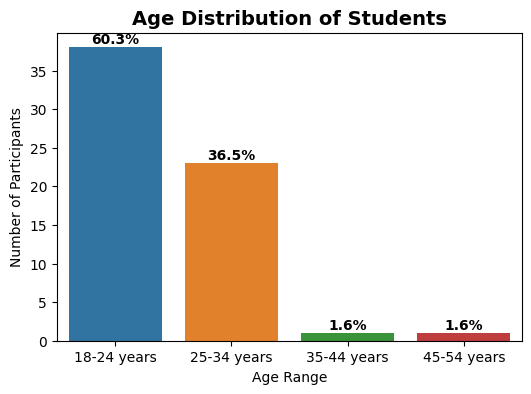

In [9]:
age_count = df["age_range"].value_counts()
age_percent = df["age_range"].value_counts(normalize=True) * 100

Age_summary = pd.DataFrame({
    "Frequency" : age_count,
    "Percentage" : age_percent.round(1)
})
print(Age_summary)

# sns.barplot(age_count)

# Generating new dataframe
age_df = age_count.reset_index()
age_df.columns = ["age_range", "count"]
age_df["percentage"] = age_percent.values

# bar plot
plt.figure(figsize=(6,4))
ax = sns.barplot(
    data=age_df,
    x="age_range", 
    y="count", 
    hue="age_range",
    legend=False
)

# Add percentages on top of bars
for i, row in age_df.iterrows():
    ax.text(i, row["count"] + 0.5, f"{row['percentage']:.1f}%", 
            ha='center', fontsize=10, fontweight="bold")

# Labels and title
plt.title("Age Distribution of Students", fontsize=14, fontweight="bold")
plt.xlabel("Age Range")
plt.ylabel("Number of Participants")
plt.savefig("Age", dpi=300, bbox_inches="tight")
plt.show()


**Majority of the student in the last cohort were aged between 18-24 years (38 students (60.3%)), followed by those aged 25-34 years who were 23 (36.5%), and only 2 students above 35 years. Therefore, the biggest population in last years cohort was young.** 

In [10]:
# Generating a new variable
Age_mapping = {
    "18-24 years" : "18-24 years",
    "25-34 years" : "25-34 years",
    "45-54 years" : "35+ years",
    "35-44 years" : "35+ years"
}
df["Age_range_new"] = df["age_range"].replace(Age_mapping)
print(df["Age_range_new"].value_counts())

Age_range_new
18-24 years    38
25-34 years    23
35+ years       2
Name: count, dtype: int64


C:\Users\ekiru\AppData\Local\Temp\ipykernel_45532\929757186.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["Age_range_new"] = df["age_range"].replace(Age_mapping)


## ***Gender***

        Frequency  Percentage
gender                       
Male           37        58.7
Female         26        41.3


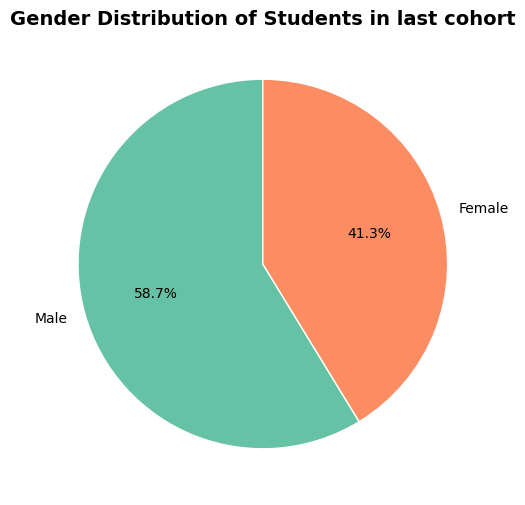

In [11]:

gender_count = df['gender'].value_counts()
gender_percent = df["gender"].value_counts(normalize=True) * 100

Gender_summary = pd.DataFrame({
    "Frequency": gender_count,
    "Percentage" : gender_percent.round(1)
})
print(Gender_summary)

# sns.barplot(gender_count)

# New Gender dataframe
gender_df = gender_count.reset_index()
gender_df.columns = ["gender_cat", "counts"]
gender_df["Percentage"] = gender_percent.values

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    gender_df["counts"], 
    labels=gender_df["gender_cat"], 
    autopct="%1.1f%%",      # shows percentages
    startangle=90,          # rotate start for better look
    wedgeprops={"edgecolor":"white"}, 
    colors=sns.color_palette("Set2")  # nice seaborn colors
)

plt.title("Gender Distribution of Students in last cohort", fontsize=14, fontweight="bold")
plt.savefig("Gender", dpi=300, bbox_inches="tight")
plt.show()


**Males were more than female with 37 (58.7%) and 26 (41.3%) respectively**

## ***Country***

              Frequency  Percentage
country                            
Kenya                62        98.4
South Africa          1         1.6


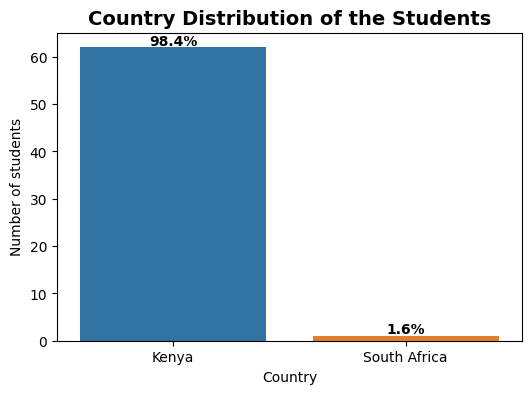

In [12]:
country_count = df['country'].value_counts()
country_percent = df['country'].value_counts(normalize=True) * 100

Country_summary = pd.DataFrame({
    "Frequency" : country_count,
    "Percentage" : country_percent.round(1)
})
print(Country_summary)

#sns.barplot(country_count)

country_df = country_count.reset_index()
country_df.columns = ["country", "count"]
country_df["percentage"] = country_percent.values

# Bar graph
plt.figure(figsize=(6,4))
ax = sns.barplot(data=country_df, x="country", y="count", hue="country", legend=False)

for i, row in country_df.iterrows():
    ax.text(i, row["count"] + 0.5, f"{row['percentage']:.1f}%", 
            ha='center', fontsize=10, fontweight="bold")

plt.title("Country Distribution of the Students", fontsize=14, fontweight="bold")
plt.xlabel("Country")
plt.ylabel("Number of students")
plt.savefig("Country", dpi=300, bbox_inches="tight")
plt.show()


**In the last cohort, Out of the 63 student who enrolled, only 1 student (South Africa) who was not from Kenya.**

## ***Where did you hear about Everything Data?***

                                   frequency  percentage
source                                                  
WhatsApp                                  36        57.1
Twitter                                   14        22.2
LinkedIn                                   7        11.1
Word of mouth                              4         6.3
Instagram                                  1         1.6
through a geeks for geeks webinar          1         1.6


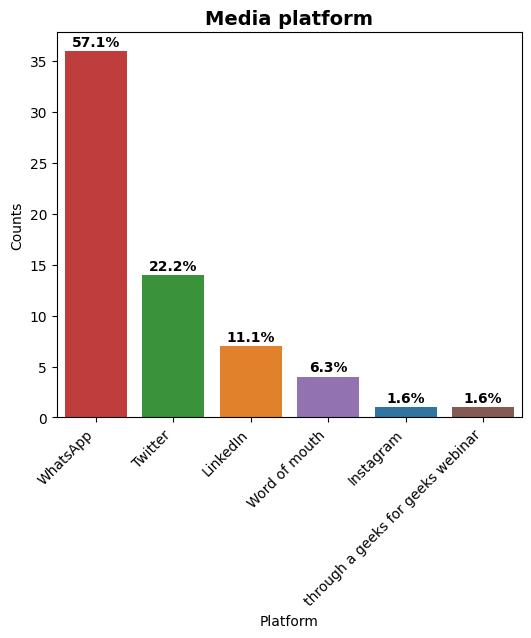

In [13]:
source_count = df['source'].value_counts()
source_percent = df['source'].value_counts(normalize=True) * 100

Source_summary = pd.DataFrame({
    "frequency" : source_count,
    "percentage" : source_percent.round(1)
})
print(Source_summary)

# Generating new source dataset
source_df = source_count.reset_index()
source_df.columns = ["source", "count"]
source_df["percentage"] = source_percent.values

order = source_df["source"].tolist()

# Bar graphs
plt.figure(figsize=(6,5))
ax = sns.barplot(data=source_df, x="source", y="count", hue="source",order=order, legend=False)

for i, row in source_df.iterrows():
    ax.text(i, row["count"] + 0.5, f"{row['percentage']:.1f}%", 
            ha='center', fontsize=10, fontweight="bold")

plt.title("Media platform", fontsize=14, fontweight="bold")
plt.xlabel("Platform")
plt.ylabel("Counts")

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.savefig("Media_platform", dpi=300, bbox_inches="tight")
plt.show()


**Majority of the students in the last cohort heard about the Everything Data program from WhatsApp platform estimating to 57.1%, followed by Twitter estimating to 22.2%, then Linkedln estimating to 11.1%. Other platforms fell below 10% that is instagram, Word of mouth, geek webinar.**

## ***How many years of learning experience do you have in the field of data?***

                      Frequency  percentage
years_experience                           
Less than six months         41   65.079365
6 months - 1 year            14   22.222222
1-3 years                     6    9.523810
4-6 years                     2    3.174603


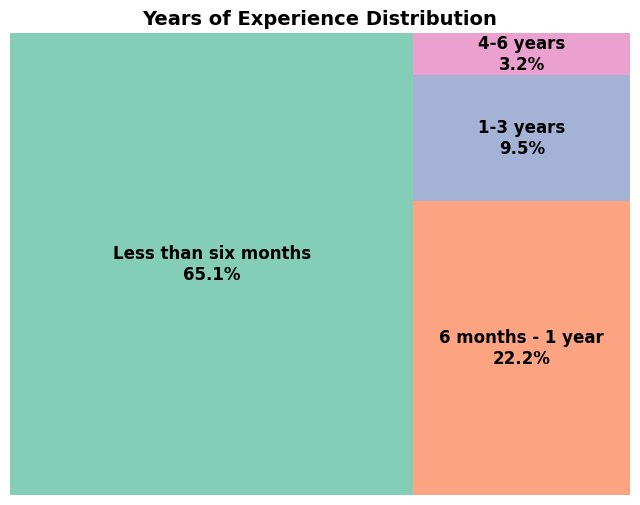

In [14]:
experience_count = df["years_experience"].value_counts()
experience_percent = df["years_experience"].value_counts(normalize=True) * 100

experience_summary = pd.DataFrame({
    "Frequency" : experience_count,
    "percentage" : experience_percent
})
print(experience_summary)

# importing library
import squarify

# Generating new dataset
experience_df = experience_count.reset_index()
experience_df.columns = ["levels", "count"]
experience_df["percentage"] = experience_percent.values

# Prepare labels with percentage
labels = [
    f"{row['levels']}\n{row['percentage']:.1f}%"
    for _, row in experience_df.iterrows()
]

# Plot treemap
plt.figure(figsize=(8,6))
squarify.plot(
    sizes=experience_df["count"], 
    label=labels, 
    alpha=0.8,
    color=["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3"],
    text_kwargs={'fontsize':12, 'weight':'bold'}
)

plt.title("Years of Experience Distribution", fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()

**The biggest population of student in the last cohort had less than 1 year of experience in the data field. Out of 63 students, 41 of them had 0-6 months of experience in the Data field estimating to 65.1%, followed by 14 students had experience of 6 months to 1 year estimating to 22.2%. A few student had above 1 year of experience.**

## ***Which track are you applying for?***

               frequency  percentage
track                               
Data science          61        96.8
Data analysis          2         3.2


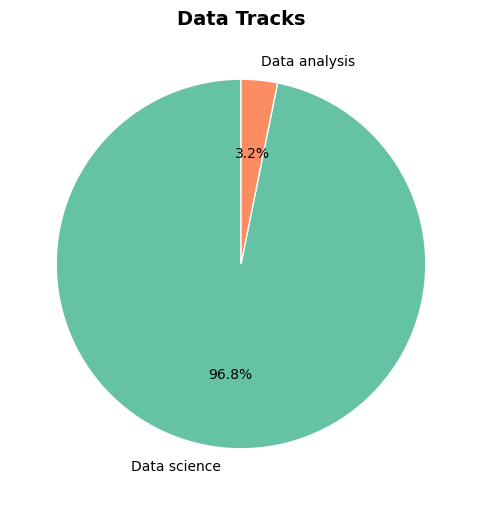

In [15]:
track_count = df['track'].value_counts()
track_percent = df['track'].value_counts(normalize=True) * 100

track_summary = pd.DataFrame({
    "frequency" : track_count,
    "percentage" : track_percent.round(1)
})
print(track_summary)

track_df = track_count.reset_index()
track_df.columns = ['track','count']
track_df['percentage'] = track_percent.values

plt.figure(figsize=(6,6))
plt.pie(
    track_df["count"],
    labels = track_df["track"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"edgecolor":"white"}, 
    colors=sns.color_palette("Set2")
)

plt.title("Data Tracks", fontsize=14, fontweight="bold")
plt.savefig("Data_tracks", dpi=300, bbox_inches="tight")
plt.show()

***The biggest population of student in the last cohort had applied for the Data Science track (96.8%) and only 3.2%for Data Analysis.***

## ***How many hours per week can you commit to learning?***

In [16]:
hour_count = df['hours_per_week'].value_counts()
hour_percent = df['hours_per_week'].value_counts(normalize=True) * 100

hours_summary = pd.DataFrame({
    "frequency" : hour_count,
    "percentage" : hour_percent.round(1)
})
print(hours_summary)

hour_df = hour_count.reset_index()
hour_df.columns = ['hours_levels', 'counts'] # Declaring column names
hour_df['percentage'] = hour_percent.values


# VISUALIZING THE HOURS COMMITTED
# library
import plotly.express as px

# Creating a grid layout
n = len(hour_df) # Getting the number of categorise

# Creating artificial coordinates
grid_x = np.arange(n) % 4   # 4 columns
grid_y = np.arange(n) // 4  # rows

# Adding percentage labels
hour_df["label"] = hour_df["hours_levels"].astype(str) + "<br>" + hour_df["percentage"].round(1).astype(str) + "%"

# Bubble chart
fig = px.scatter(
    hour_df,
    x=grid_x, 
    y=grid_y,
    size="counts",
    text="label",
    hover_data={"counts": True, "percentage": True},
    size_max=120,
    title="Hours per Week Bubble Chart"
)

# Improve layout
fig.update_traces(textposition="middle center", textfont_size=14)
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.update_layout(
    width=800, height=600,
    showlegend=False
)

fig.show()


                    frequency  percentage
hours_per_week                           
7-14 hours                 37        58.7
more than 14 hours         18        28.6
less than 6 hours           8        12.7


***Most of the student reported to be able to commit 7-14 hours for learning estimating to 58.7%. Only 12.7% could commit less than 6 hours for learning, and 28.6% could commit more than 14 hours for learning.***

## ***What is your main aim for joining the mentorship program?***

C:\Users\ekiru\AppData\Local\Temp\ipykernel_45532\1366075076.py:9: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



                           frequency  percentage
main_aim_new                                    
Upskill                           39        61.9
Learn data afresh                 14        22.2
Build a project portfolio          7        11.1
Others                             3         4.8


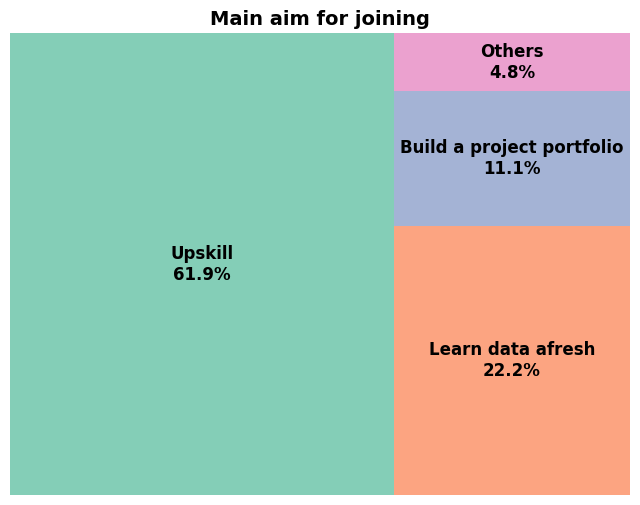

In [17]:
mapping = {
    'Upskill' : 'Upskill',
    'Learn data afresh' : 'Learn data afresh',
    "Build a project portfolio" : 'Build a project portfolio',
    'Connect with fellow data professionals' : 'Others',
    'both upskilling and connecting with fellow data professionals' : 'Others'
}

df['main_aim_new'] = df['main_aim'].replace(mapping)

main_aim_count = df['main_aim_new'].value_counts()
main_aim_precent = df['main_aim_new'].value_counts(normalize=True) * 100
main_aim_summary = pd.DataFrame({
    "frequency" : main_aim_count,
    "percentage" : main_aim_precent.round(1)
})
print(main_aim_summary)

# Generating new dataset
main_aim_df = main_aim_count.reset_index()
main_aim_df.columns = ["levels", "count"]
main_aim_df["percentage"] = main_aim_precent.values

# Prepare labels with percentage
labels = [
    f"{row['levels']}\n{row['percentage']:.1f}%"
    for _, row in main_aim_df.iterrows()
]

# Plot treemap
plt.figure(figsize=(8,6))
squarify.plot(
    sizes=main_aim_df["count"], 
    label=labels, 
    alpha=0.8,
    color=["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3"],
    text_kwargs={'fontsize':12, 'weight':'bold'}
)

plt.title("Main aim for joining", fontsize=14, fontweight="bold")
plt.axis("off")
plt.savefig("Years_experience", dpi=300, bbox_inches="tight")
plt.show()

***Majority of the students in the last cohort enrolled for the program to increase on their data skills (61.9%), followed by those whose interest was to learn data from the grass roots (22.2%). Only 11.1% were interested in building a project portfolio, and 4.8% under others.***

## ***What is your motivation to join the Everything Data mentorship program?***

In [18]:
print(df['motivation'].tolist())


# Example: assuming your motivation column is named "motivation"
def categorize_motivation(text):
    text = str(text).lower()
    
    if any(word in text for word in ["career", "job", "employment", "freelance", "profession", "work"]):
        return "Career Growth / Jobs"
    elif any(word in text for word in ["skill", "learn", "upskill", "improve", "knowledge", "training", "fundamentals"]):
        return "Skills Development"
    elif any(word in text for word in ["passion", "interest", "love", "eager", "thrilled", "excited", "numbers speak"]):
        return "Passion / Interest in Data"
    elif any(word in text for word in ["mentor", "mentorship", "community", "connect", "network", "peers"]):
        return "Networking / Mentorship"
    elif any(word in text for word in ["health", "research", "academic", "masters", "degree", "engineering", "bioinformatics"]):
        return "Academic / Research"
    else:
        return "Other"

# Apply categorization
df["motivation_theme"] = df["motivation"].apply(categorize_motivation)

# Get frequencies and percentages
theme_summary = df["motivation_theme"].value_counts().to_frame("Frequency")
theme_summary["Percentage"] = (theme_summary["Frequency"] / len(df)) * 100

print(theme_summary)



['to enter into the data analysis career', 'To grow and improve my skills in data science and also move with the changing trends in the world of data.', 'I’m motivated to join Everything Data to enhance my data analysis skills, gain mentorship, and develop soft skills to tackle healthcare challenges in Kenya and advance my career in bioinformatics.', "I'd like to upskill and Join the Data Community", 'I aim to join the mentorship program to enhance my data science skills and connect with industry experts, enabling me to impact economic, health, and environmental sectors.', 'The need to learn and get into understanding something and everything to do with data analytics and the application part and the inferences from data', 'To learn data science and develop skills necessary for my future ambitions', "I'm eager to gain a solid foundation in data fundamentals and learn from experienced mentors who can guide me on my learning journey.", 'I am inspired to make more data driven decisions in

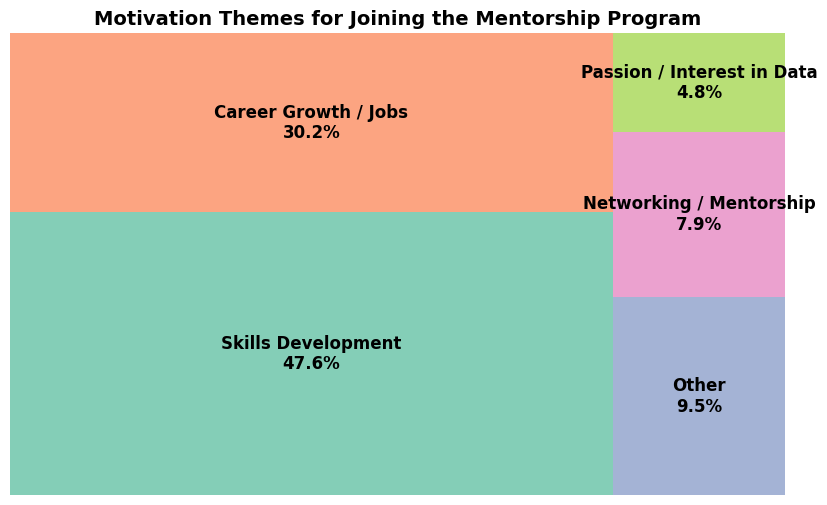

In [19]:
import matplotlib.pyplot as plt
import squarify

# Summarize themes
theme_summary = df["motivation_theme"].value_counts().reset_index()
theme_summary.columns = ["Theme", "Count"]
theme_summary["Percentage"] = (theme_summary["Count"] / len(df)) * 100

# Labels: Theme + percentage
labels = [
    f"{row['Theme']}\n{row['Percentage']:.1f}%"
    for _, row in theme_summary.iterrows()
]

# Treemap plot
plt.figure(figsize=(10,6))
squarify.plot(
    sizes=theme_summary["Count"],
    label=labels,
    alpha=0.8,
    color=["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#ffd92f"],
    text_kwargs={'fontsize':12, 'weight':'bold'}
)

plt.title("Motivation Themes for Joining the Mentorship Program", fontsize=14, fontweight="bold")
plt.axis("off")
plt.savefig("Motivation_themes", dpi=300, bbox_inches="tight")
plt.show()


**The biggest motivation among the last cohort students was skill development (47.6%), followed by those whose motivation was for career development in terms of jobs (30.2%). population of student in the last cohort had less than 1 year of experience in the data field. Out of 63 students, 41 of them had 0-6 months of experience in the Data field estimating to 65.1%, followed by 14 students had experience of 6 months to 1 year estimating to 22.2%. A few student had above 1 year of experience.**

## ***How best would you describe your skill level in the track you are applying for?***

['Beginner - I have NO learning or work experie..., 'Elementary - I have theoretical understanding..., 'Intermediate - I have theoretical knowledge a...]
Categories (3, object): ['Beginner - I have NO learning or work experie..., 'Elementary - I have theoretical understanding..., 'Intermediate - I have theoretical knowledge a...]
                 frequency  percentage
skill_level_new                       
Elementary              28        44.4
Beginner                26        41.3
Intermediate             9        14.3


C:\Users\ekiru\AppData\Local\Temp\ipykernel_45532\3390190749.py:9: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



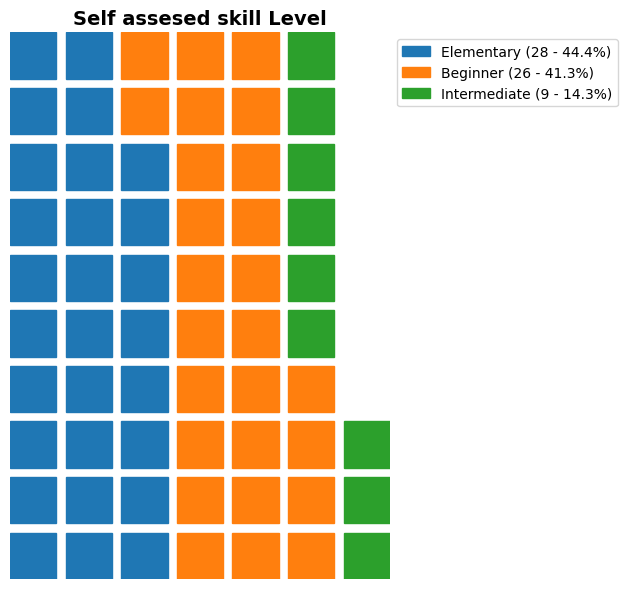

In [20]:
print(df['skill_level'].unique())

mapping = {
    'Beginner - I have NO learning or work experience in data analysis/ data science' : 'Beginner',
    'Elementary - I have theoretical understanding of basic data analysis/ data science concepts' : 'Elementary',
    'Intermediate - I have theoretical knowledge and experience in data analysis/ data science' : 'Intermediate'
}

df['skill_level_new'] = df['skill_level'].replace(mapping)

skill_level_new_count = df['skill_level_new'].value_counts()
skill_level_new_precent = df['skill_level_new'].value_counts(normalize=True) * 100
skill_level_new_summary = pd.DataFrame({
    "frequency" : skill_level_new_count,
    "percentage" : skill_level_new_precent.round(1)
})
print(skill_level_new_summary)

skills_df = skill_level_new_count.reset_index()
skills_df.columns = ['skill_level', 'count']
skills_df['percentage'] = skill_level_new_precent.values

# library
from pywaffle import Waffle

# Convert dataframe to dictionary {category: count}
data = dict(zip(skills_df['skill_level'], skills_df['count']))

# Waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,   # grid height (adjust to make chart bigger/smaller)
    values=data,
    colors=["#1f77b4", "#ff7f0e", "#2ca02c"],  # colors for each skill level
    labels=[f"{k} ({v} - {p:.1f}%)" for k,v,p in zip(skills_df['skill_level'], skills_df['count'], skills_df['percentage'])],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(10, 6)
)

plt.title("Self assesed skill Level", fontsize=14, fontweight="bold")
plt.savefig("Skill_level", dpi=300, bbox_inches="tight")
plt.show()


***Majority of the students in the last cohort, at the point of enrollment into the Everything Data program either had NO learning or work experience (Beginner: 26 - 41.3%) or have theoretical understanding (Elementary: 28 - 44.4%) of data analysis/ data science***

## ***Have you completed the everything data aptitude test for your track?***

                 frequency  percentage
aptitude_status                       
Yes                     61        96.8
No                       2         3.2


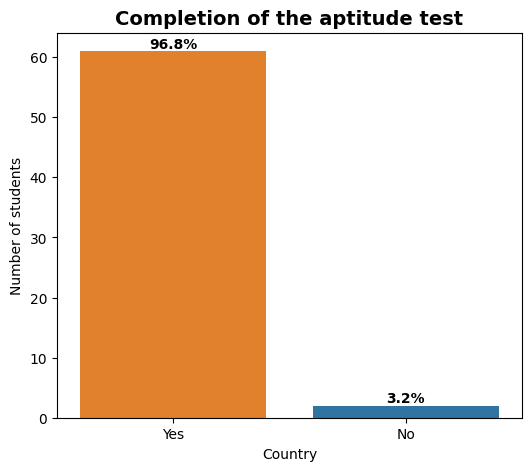

In [21]:
aptitude_count = df['aptitude_status'].value_counts()
aptitude_precent = df['aptitude_status'].value_counts(normalize=True) * 100
aptitude_summary = pd.DataFrame({
    "frequency" : aptitude_count,
    "percentage" : aptitude_precent.round(1)
})
print(aptitude_summary)

aptitude_df = aptitude_count.reset_index()
aptitude_df.columns = ['aptitude_status', 'count']
aptitude_df['percentage'] = aptitude_precent.values

order = aptitude_df["aptitude_status"].tolist()

# Bar graph
plt.figure(figsize=(6,5))
ax = sns.barplot(data=aptitude_df, x="aptitude_status", y="count", hue="aptitude_status", order=order, legend=False)

for i, row in aptitude_df.iterrows():
    ax.text(i, row["count"] + 0.5, f"{row['percentage']:.1f}%", 
            ha='center', fontsize=10, fontweight="bold")

plt.title("Completion of the aptitude test", fontsize=14, fontweight="bold")
plt.xlabel("Country")
plt.ylabel("Number of students")
plt.savefig("Aptitude test", dpi=300, bbox_inches="tight")
plt.show()


***96.8% of the students completed the aptitude test***

## ***Total score***

In [22]:
print(df['total_score'].describe())

count    63.000000
mean     69.261905
std       7.238371
min      58.330000
25%      64.000000
50%      67.670000
75%      74.330000
max      83.670000
Name: total_score, dtype: float64


***The mean total score was 69%, minimum score was 58%, and the maximum score was 84%. The aptitude score performance generally was good.***

## ***Graduated***

           frequency  percentage
Graduated                       
No                48        76.2
Yes               15        23.8


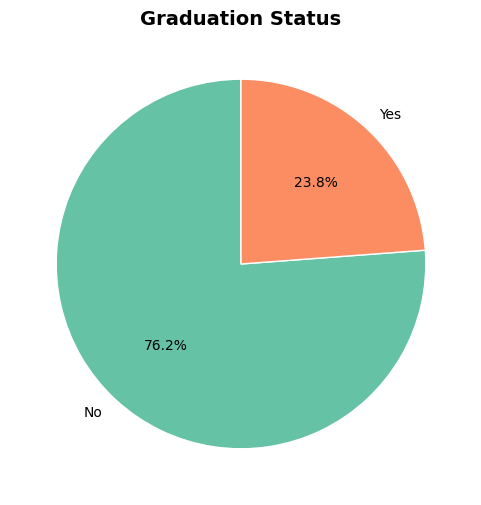

In [23]:
graduated_count = df['Graduated'].value_counts()
graduated_percent = df['Graduated'].value_counts(normalize=True) * 100
graduated_summary = pd.DataFrame({
    "frequency" : graduated_count,
    "percentage" : graduated_percent.round(1)
})
print(graduated_summary)

graduated_df = graduated_count.reset_index()
graduated_df.columns = ['track','count']
graduated_df['percentage'] = graduated_percent.values

plt.figure(figsize=(6,6))
plt.pie(
    graduated_df["count"],
    labels = graduated_df["track"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"edgecolor":"white"}, 
    colors=sns.color_palette("Set2")
)

plt.title("Graduation Status", fontsize=14, fontweight="bold")
plt.savefig("Graduation status", dpi=300, bbox_inches="tight")
plt.show()

***Out of 63 students, 48 did not graduate estimating to 76.2%, and only 23.8% of them graduated.***

## **Motivation themes with Graduation status**

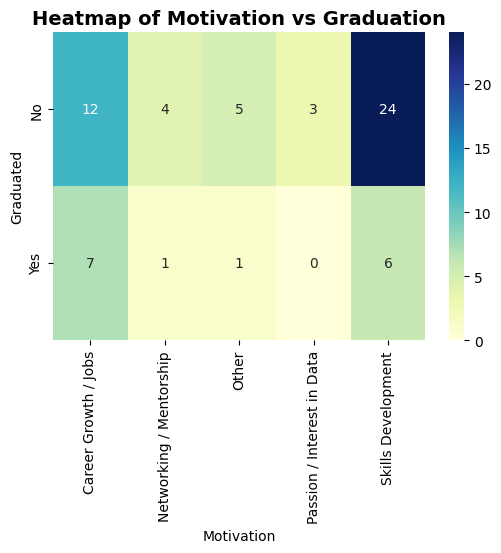

In [24]:
crosstab = pd.crosstab(df["Graduated"], df['motivation_theme'])

plt.figure(figsize=(6,4))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Heatmap of Motivation vs Graduation", fontsize=14, fontweight="bold")
plt.xlabel("Motivation")
plt.ylabel("Graduated")
plt.savefig("Motivation and Graduate", dpi=300, bbox_inches="tight")
plt.show()


### **Motivation themes distribution among those that graduated**

C:\Users\ekiru\AppData\Local\Temp\ipykernel_45532\3504294893.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




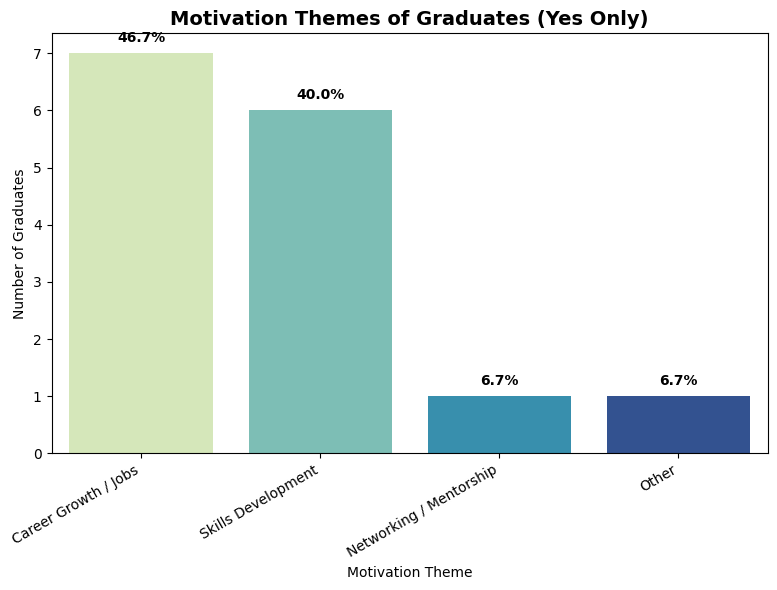

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only graduates
graduates = df[df["Graduated"] == "Yes"]

# Count motivation themes among graduates
motivation_counts = graduates["motivation_theme"].value_counts().reset_index()
motivation_counts.columns = ["motivation_theme", "count"]

# Calculate percentages
motivation_counts["percentage"] = (motivation_counts["count"] / motivation_counts["count"].sum()) * 100

# Plot
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=motivation_counts,
    x="motivation_theme",
    y="count",
    palette="YlGnBu"
)

# Annotate bars with percentages
for i, row in motivation_counts.iterrows():
    ax.text(
        i,
        row["count"] + 0.2,  # a little above the bar
        f"{row['percentage']:.1f}%",
        ha="center",
        fontsize=10,
        fontweight="bold"
    )

plt.title("Motivation Themes of Graduates (Yes Only)", fontsize=14, fontweight="bold")
plt.xlabel("Motivation Theme")
plt.ylabel("Number of Graduates")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.savefig("Graduates_vs_Motivation.png", dpi=300, bbox_inches="tight")
plt.show()


***Out of the 15 students who graduated in the last cohort, 13 of them were highly motivated to develop their skills, for career growth and to get jobs estimating to 87%, and only 13% on other motivations***

***Among those who graduated, 8 committed 7-14hrs of learning, followed by 5 students who committed more than 14 hrs for learning. Only 2 students committed less than 6 hr. However, the number of hours that one commits to learning does not guarantee graduation basing on the distribution of the numbers.***

## **Age with Graduate status**

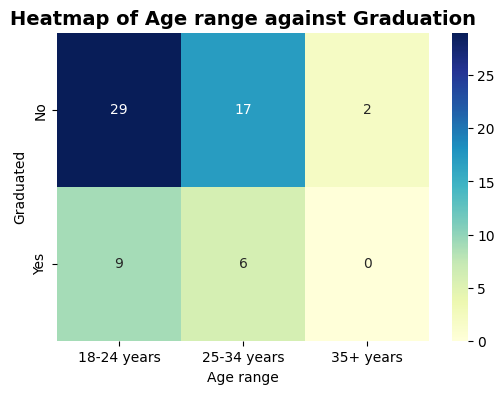

In [26]:
crosstab = pd.crosstab(df["Graduated"], df['Age_range_new'])

plt.figure(figsize=(6,4))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Heatmap of Age range against Graduation", fontsize=14, fontweight="bold")
plt.xlabel("Age range")
plt.ylabel("Graduated")
# plt.savefig("Age and Graduate", dpi=300, bbox_inches="tight")
plt.show()


### **Age distribution among those who graduated**

C:\Users\ekiru\AppData\Local\Temp\ipykernel_45532\1565200756.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




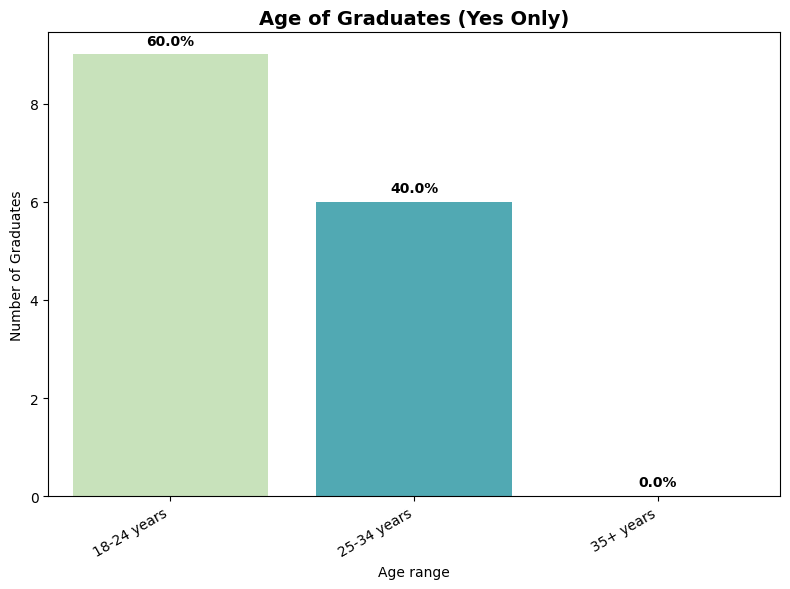

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only graduates
graduates = df[df["Graduated"] == "Yes"]

# Count motivation themes among graduates
age_counts = graduates['Age_range_new'].value_counts().reset_index()
age_counts.columns = ["Age_range_new", "count"]

# Calculate percentages
age_counts["percentage"] = (age_counts["count"] / age_counts["count"].sum()) * 100

# Plot
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=age_counts,
    x="Age_range_new",
    y="count",
    palette="YlGnBu"
)

# Annotate bars with percentages
for i, row in age_counts.iterrows():
    ax.text(
        i,
        row["count"] + 0.2,  # a little above the bar
        f"{row['percentage']:.1f}%",
        ha="center",
        fontsize=10,
        fontweight="bold"
    )

plt.title("Age of Graduates (Yes Only)", fontsize=14, fontweight="bold")
plt.xlabel("Age range")
plt.ylabel("Number of Graduates")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.savefig("Graduates_vs_Age.png", dpi=300, bbox_inches="tight")
plt.show()


***60% male, 40% female among graduates***

## **Gender with Graduation status**

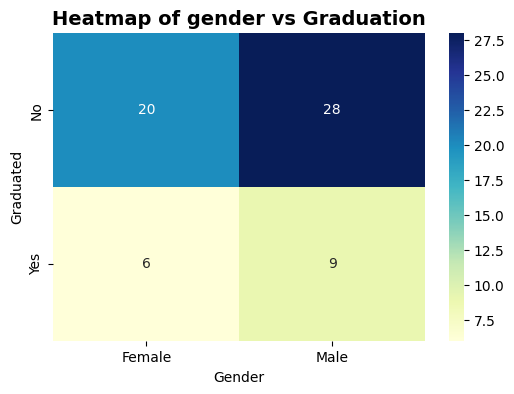

In [28]:
crosstab = pd.crosstab(df["Graduated"], df['gender'])

plt.figure(figsize=(6,4))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Heatmap of gender vs Graduation", fontsize=14, fontweight="bold")
plt.xlabel("Gender")
plt.ylabel("Graduated")
# plt.savefig("Age and Graduate", dpi=300, bbox_inches="tight")
plt.show()


### **Gender distribution among those who graduated**

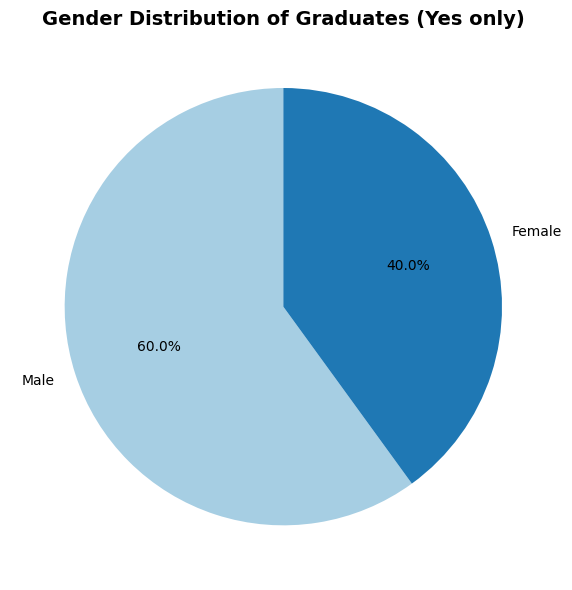

In [29]:
# Filter only graduates
graduates = df[df["Graduated"] == "Yes"]

# Count gender among graduates
gender_counts = graduates['gender'].value_counts().reset_index()
gender_counts.columns = ["gender", "count"]

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    gender_counts["count"],
    labels=gender_counts["gender"],
    autopct="%.1f%%",
    startangle=90,
    colors=plt.cm.Paired.colors
)

plt.title("Gender Distribution of Graduates (Yes only)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("Graduates_vs_gender_pie.png", dpi=300, bbox_inches="tight")
plt.show()


***60% male, 40% female among graduates***

## **Skill level with Graduation status**

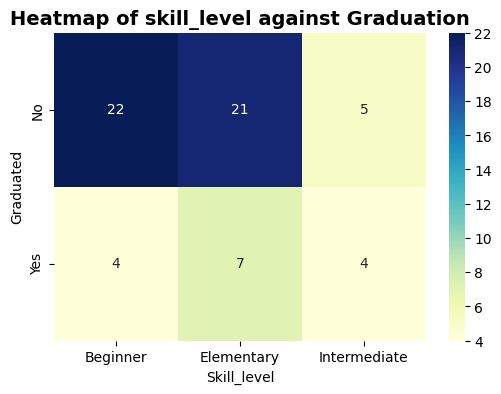

In [30]:
crosstab = pd.crosstab(df["Graduated"], df['skill_level_new'])

plt.figure(figsize=(6,4))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Heatmap of skill_level against Graduation", fontsize=14, fontweight="bold")
plt.xlabel("Skill_level")
plt.ylabel("Graduated")
# plt.savefig("Age and Graduate", dpi=300, bbox_inches="tight")
plt.show()

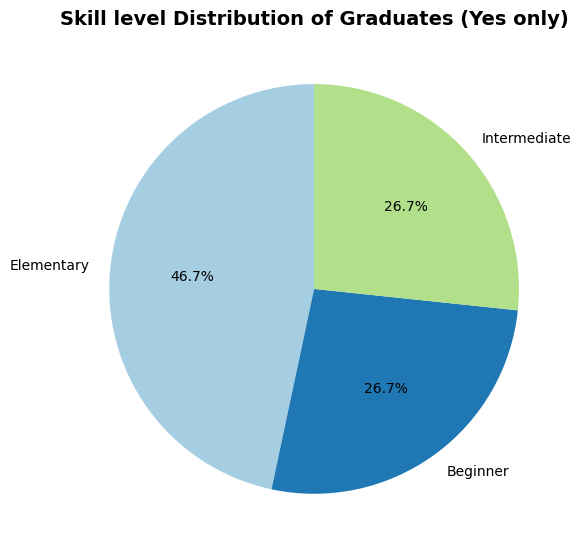

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only graduates
graduates = df[df["Graduated"] == "Yes"]

# Count motivation themes among graduates
skill_level_new_counts = graduates['skill_level_new'].value_counts().reset_index()
skill_level_new_counts.columns = ['skill_level_new', "count"]

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    skill_level_new_counts["count"],
    labels=skill_level_new_counts["skill_level_new"],
    autopct="%.1f%%",
    startangle=90,
    colors=plt.cm.Paired.colors
)

plt.title("Skill level Distribution of Graduates (Yes only)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("Graduates_vs_skill_level_pie.png", dpi=300, bbox_inches="tight")
plt.show()


***46.7% among the students who graduated were had an elementary skill level in their particular data track, followed by those with an intermediate and beginner skill level at 26.7%***

# **BIVARIATE ANALYSIS**

***This is to identify what variable are associated with the outcome ('Graduated')***

### ***Converting categorical variables to numeric***

In [32]:
df.columns # listing the columns

Index(['timestamp', 'Id. No', 'age_range', 'gender', 'country', 'source',
       'years_experience', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_status', 'total_score', 'Graduated',
       'Age_range_new', 'main_aim_new', 'motivation_theme', 'skill_level_new'],
      dtype='object')

In [33]:
df1 = df.drop(columns=['timestamp','Id. No','age_range','main_aim','motivation','skill_level'])
df1.columns # confirming changes

Index(['gender', 'country', 'source', 'years_experience', 'track',
       'hours_per_week', 'aptitude_status', 'total_score', 'Graduated',
       'Age_range_new', 'main_aim_new', 'motivation_theme', 'skill_level_new'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder

# Re-coding variables
le = LabelEncoder()

for column in df1.columns:
    if df1[column].dtype == 'object' or str(df1[column].dtype) == 'category':
        df1[column] = le.fit_transform(df1[column].astype(str))

print(df1.head(), '\n')
print(df1.info())


   gender  country  source  years_experience  track  hours_per_week  \
0       1        0       4                 3      1               1   
1       1        0       3                 2      1               2   
2       0        0       3                 2      1               2   
3       0        0       3                 2      1               0   
4       1        0       3                 3      1               0   

   aptitude_status  total_score  Graduated  Age_range_new  main_aim_new  \
0                1        58.67          0              0             3   
1                1        70.00          0              1             3   
2                1        64.33          1              0             3   
3                1        75.00          0              0             3   
4                1        59.00          0              0             3   

   motivation_theme  skill_level_new  
0                 0                0  
1                 4                1  
2    

### **Correlation Matrix**
***A correlation matrix was done to identify multi-collinearity***

In [35]:
# Correlation Analysis

correlation_matrix = df1.corr()

correlation_matrix

,gender,country,source,years_experience,track,hours_per_week,aptitude_status,total_score,Graduated,Age_range_new,main_aim_new,motivation_theme,skill_level_new
gender,1.000000,0.106461,-0.157711,0.142402,-0.151787,0.115161,-0.151787,-0.033722,0.014419,0.182468,0.159418,0.059231,-0.139949
country,0.106461,1.000000,0.057098,0.077369,0.022996,-0.100299,-0.701381,0.131022,-0.070995,0.130682,-0.246503,0.120640,-0.133464
source,-0.157711,0.057098,1.000000,0.109558,0.226316,-0.193996,0.021166,-0.040754,0.040213,-0.106404,-0.154656,-0.010798,-0.096960
years_experience,0.142402,0.077369,0.109558,1.000000,0.082733,0.079276,-0.110310,-0.152856,-0.056760,-0.139304,-0.192041,0.156958,-0.626297
track,-0.151787,0.022996,0.226316,0.082733,1.000000,-0.266504,-0.032787,-0.176215,-0.111344,-0.023290,-0.133399,0.185796,-0.200629
hours_per_week,0.115161,-0.100299,-0.193996,0.079276,-0.266504,1.000000,-0.061751,0.048683,0.064216,0.327830,0.181312,-0.111147,0.100053
aptitude_status,-0.151787,-0.701381,0.021166,-0.110310,-0.032787,-0.061751,1.000000,0.027534,0.101222,-0.186321,0.109028,-0.120889,0.059982
total_score,-0.033722,0.131022,-0.040754,-0.152856,-0.176215,0.048683,0.027534,1.000000,-0.051529,0.336112,-0.243413,-0.131512,0.135541
Graduated,0.014419,-0.070995,0.040213,-0.056760,-0.111344,0.064216,0.101222,-0.051529,1.000000,-0.028761,0.112463,-0.163314,0.217108
Age_range_new,0.182468,0.130682,-0.106404,-0.139304,-0.023290,0.327830,-0.186321,0.336112,-0.028761,1.000000,0.211387,-0.186731,0.135170


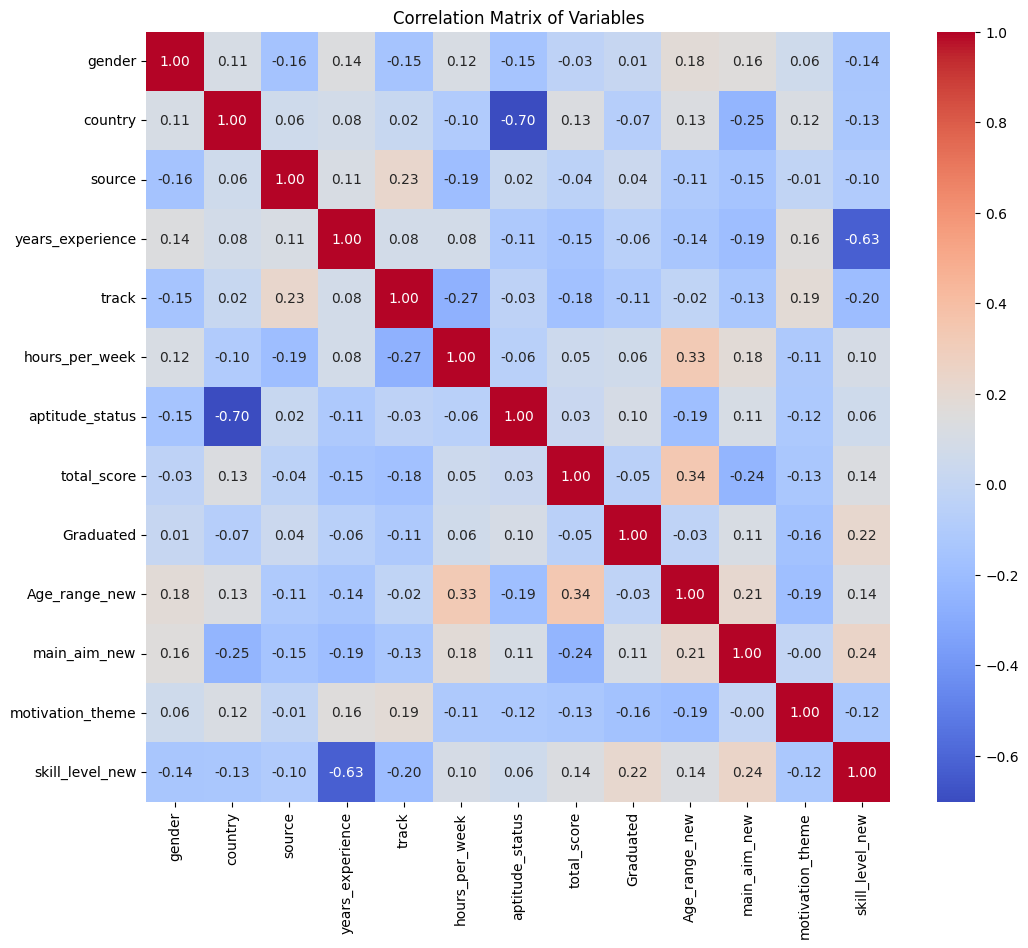

In [36]:
# prompt: visualize

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df1.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.savefig("Correlation Matrix", dpi=300, bbox_inches="tight")
plt.show()

***- There was a strong negative correlation between country and aptitude_status of 0.70, and moderate negative correlatioin between Years_experience and skill_level_new of 0.63***

***The country and Years_experience were drop.***

## **Feature selection**
***Using Chi-square Analysis and Recursive Feature Elimination (rfe)***

### **1. Bivariate Analysis (Chi-square)**
***This is to determine what variables are statistically associated with one graduating. This is using the chi-square analysis***

In [ ]:
from scipy.stats import chi2_contingency

# Categorical predictors you want to check against Graduated
predictors = ['gender', 'source', 'track', 'hours_per_week',
              'main_aim_new', 'aptitude_status', 'Age_range_new',
              'motivation_theme', 'skill_level_new']  # add more if needed

results = []

for col in predictors:
    # Crosstab for each predictor vs Graduated
    ct = pd.crosstab(df1[col], df1["Graduated"])
    
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(ct)
    
    results.append({
        "Variable": col,
        "Chi2": round(chi2, 3),
        "dof": dof
    })


# Put results in a summary DataFrame
chi_results = pd.DataFrame(results)
print(chi_results)


           Variable   Chi2  dof
0            gender  0.000    1
1            source  4.156    5
2             track  0.002    1
3    hours_per_week  0.260    2
4      main_aim_new  4.160    3
5   aptitude_status  0.000    1
6     Age_range_new  0.691    2
7  motivation_theme  3.165    4
8   skill_level_new  3.152    2


***There were 3 variables, that is; gender (0.000), track (0.002), and aptitude_status (0.000), that were statistically significantly associated with the status of one graduating***

### ***Testing significance of total_score using the t-test (Independent sample t-test)***

In [38]:
# Descriptive statistics
df.groupby("Graduated")["total_score"].describe()


C:\Users\ekiru\AppData\Local\Temp\ipykernel_45532\3629519906.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,count,mean,std,min,25%,50%,75%,max
Graduated,,,,,,,,
No,48.0,69.46875,7.369192,58.67,64.000,68.17,74.4975,83.67
Yes,15.0,68.60000,7.007491,58.33,63.665,66.33,73.6650,83.00


***There was no big difference in the perofrmance between the students who graduated and those that did not graduate***

In [39]:
from scipy.stats import shapiro, levene

# Split groups
graduates = df[df["Graduated"]=="Yes"]["total_score"]
nongraduates = df[df["Graduated"]=="No"]["total_score"]

# Normality
print("Graduates normality:", shapiro(graduates))
print("Non-graduates normality:", shapiro(nongraduates))

# NOTE:
# NORMALITY ASSUMPTION
# p <= 0.05 = reject the Ho, Data are not normally distributed
# p > 0.05 = fail to reject the Ho, Data are normally distributed

# Homogeneity of variances
print("Levene test:", levene(graduates, nongraduates))

# NOTE:
# Homogeneity of variances test
# p <= 0.05 = reject the Ho, groups have unequal variance
# p > 0.05 = fail to reject the Ho, groups have equal variance


Graduates normality: ShapiroResult(statistic=np.float64(0.962430900143379), pvalue=np.float64(0.7345573854348583))
Non-graduates normality: ShapiroResult(statistic=np.float64(0.9447948630301102), pvalue=np.float64(0.024908445819136985))
Levene test: LeveneResult(statistic=np.float64(0.21133279546977501), pvalue=np.float64(0.6473590549268711))


***Both the normality and homogeneity assumption hold***

In [40]:
from scipy.stats import ttest_ind, mannwhitneyu

# Ho: There is no statistical significance between Graduated and total_score
# Ho: There is statistical significance between Graduated and total_score

# T-test
t_stat, p_val = ttest_ind(graduates, nongraduates, equal_var=True)
print("t-test:", t_stat, p_val)

t-test: -0.4029919507882888 0.688363123533348


***Since the p (0.688) > 0.05, we fail to reject the Ho, hence conclude that, there is no statistical significance between graduated and total_score***

### **2. Using the rfe method.**
***This is to identify what variables are associated with the ones status of graduating. This is by rankings***

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming 'Target' is your target variable column name
X = df1.drop(['Graduated','country','years_experience'], axis=1)
y = df1['Graduated']

# Initialize the RFE model
# Specify the estimator (e.g., Logistic Regression) and the number of features to select
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5) # You can adjust n_features_to_select as needed

# Fit the RFE model
rfe.fit(X, y)

# Get the ranking of features
feature_ranking = rfe.ranking_

# Get the selected features
selected_features = X.columns[rfe.support_]

print("Feature ranking:")
for i, col in enumerate(X.columns):
    print(f"{col}: Rank {feature_ranking[i]}")

print("\nSelected features:")
selected_features


Feature ranking:
gender: Rank 1
source: Rank 3
track: Rank 5
hours_per_week: Rank 4
aptitude_status: Rank 1
total_score: Rank 6
Age_range_new: Rank 1
main_aim_new: Rank 2
motivation_theme: Rank 1
skill_level_new: Rank 1

Selected features:


Index(['gender', 'aptitude_status', 'Age_range_new', 'motivation_theme',
       'skill_level_new'],
      dtype='object')

***According to the rfe, 5 variables were identified that is; gender, aptitude_status, Age_range_new, motivation_theme,
skill_level_new***

# **LOGISTIC REGRESSION MODEL**

In [43]:
from sklearn.model_selection import train_test_split

X1 = df1[['gender', 'aptitude_status', 'Age_range_new', 'motivation_theme', 'skill_level_new']]
y1 = df1[['Graduated']]

# First split, 70% training and 30% temp
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=123, stratify=y1)

# Checking the distribution of each dataset

# Number of observations (rows) and columns
print(f"Training Set: {X1_train.shape}, Testing Set: {X1_test.shape}")
print("\n")

# Percentage difference
print(f"Training size: {len(X1_train)}({len(X1_train)/len(X1)*100:.1f}%)")
print(f"Testing size: {len(X1_test)}({len(X1_test)/len(X1)*100:.1f}%)")

print("\n")

# Checking the distribution of the outcome variable
k = y1_train['Graduated'].value_counts()
print(f"Training set: {k}")

Training Set: (44, 5), Testing Set: (19, 5)


Training size: 44(69.8%)
Testing size: 19(30.2%)


Training set: Graduated
0    34
1    10
Name: count, dtype: int64


***There were 10 Yes (1) categories, and 34 No (0) categories in the training set (y train). This shows some form of imbalance.***

### ***Running a Logistic regression model***

c:\Users\ekiru\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy: 0.74


c:\Users\ekiru\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ekiru\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ekiru\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       0.00      0.00      0.00         5

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19

ROC-AUC score: 0.71
[[14  0]
 [ 5  0]]


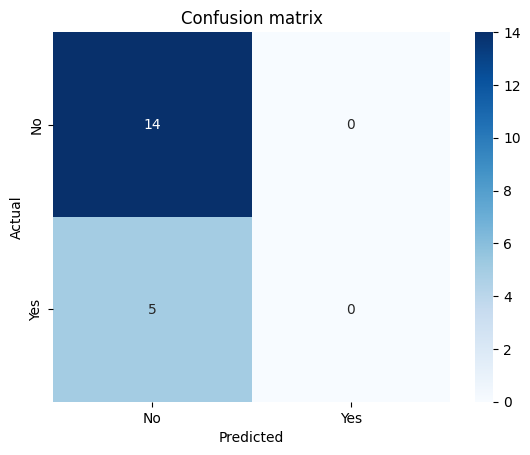

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# TESTING THE MODEL

# Initializing and training the model
model = LogisticRegression(max_iter=1000)

'''
C (inverse of regularization): [0.001, 0.01, 0.1, 1, 10, 100], # controls regularization strength
penalty (type of regularization): l2(Lasso-shrinks all coefficients making them stable), l2(Ridge-eliminates unimportant features)
solver (optimization method): liblinear (good for small datasets)
'''
# Training the model on the training data
model.fit(X1_train, y1_train)

# predict on test data
y_pred = model.predict(X1_test)

# Probability scores for class 1
y_prob = model.predict_proba(X1_test)[:, 1]
# print(y_prob)

# Accuracy
accuracy = accuracy_score(y1_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y1_test, y_pred))

auc = roc_auc_score(y1_test, y_prob)
print(f"ROC-AUC score: {auc:.2f}")

# Confusion matrix
cm = confusion_matrix(y1_test, y_pred)
print(cm)

# Visualizing the confusion
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")

# plt.savefig("Confusion matrix LG", dpi=300, bbox_inches="tight")

plt.show()

***The model achieved fair performance across all the measurement metrics, that is; accuracy score of 74%, precision, recall, F1-score, AUC scores of 54%, 74%, 63%, 71% respectively***

***The logistic regression model encountered some form of overfitting because it focused on the majority group.***

***The model perfectly predicted the category of the students that did not graduate perfectly (14 students) with no one being falsely classified. however, it poorly predicted the category of student that graduated (Yes) where it misclassified all the student that graduated as not have graduated.***

### ***Fine tuning the logistic regression model***

***Using class weights***

c:\Users\ekiru\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.40      0.40      0.40         5

    accuracy                           0.68        19
   macro avg       0.59      0.59      0.59        19
weighted avg       0.68      0.68      0.68        19

ROC-AUC score: 0.73
[[11  3]
 [ 3  2]]


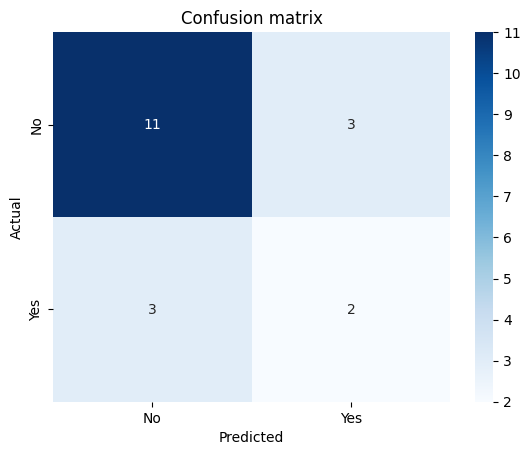

In [45]:
# FINE TUNNING

# Addressing imbalance
model1 = LogisticRegression(C=0.01, penalty='l2', solver='liblinear', class_weight="balanced",random_state=123)

model1.fit(X1_train, y1_train)


# predict on test data
y_pred = model1.predict(X1_test)

# Probability scores
y_prob = model1.predict_proba(X1_test)[:, 1]


accuracy = accuracy_score(y1_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y1_test, y_pred))

auc = roc_auc_score(y1_test, y_prob)
print(f"ROC-AUC score: {auc:.2f}")

# Confusion matrix
cm = confusion_matrix(y1_test, y_pred)
print(cm)

# Visualizing the confusion
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")

#plt.savefig("Confusion matrix LG_cw", dpi=300, bbox_inches="tight")

plt.show()


***After fine tuning, the logistic regression model's performance slightly improve.***

***The model achieved a fairly good balanced performance across all the measurement metrics, that is; accuracy score of 68%, precision, recall, F1-score of 68%, and an AUC scores of 73%***

***Using the confusion matrix, under the category of the students that did not graduate, out of the 14 actual students, the model predicted 11 as indeed not having graduated and wrongly predicted 3 students to having graduated, whereas, under the category of the students that did graduate, out of 5 actual students, only 2 were correctly classified as having graduated and 3 were wrongly classified as not having graduated.***

### ***Handling imbalance using the SMOTE method***

New class distribution after SMOTE:
 0    34
1    34
Name: count, dtype: int64


Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.33      0.40      0.36         5

    accuracy                           0.63        19
   macro avg       0.55      0.56      0.55        19
weighted avg       0.65      0.63      0.64        19

ROC-AUC score: 0.50
[[10  4]
 [ 3  2]]


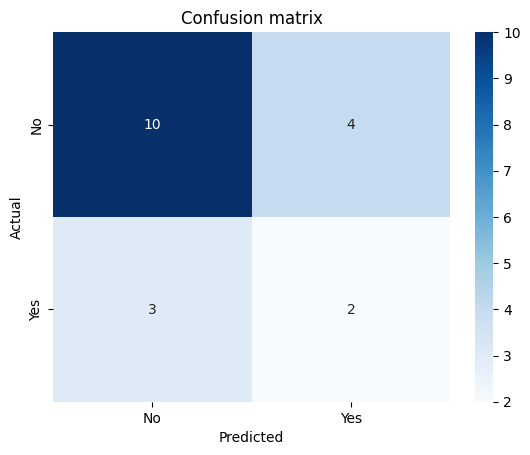

In [46]:
# SMOTE (Synthetic Minority Oversampling technique)
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="auto", random_state=123) # automatically detect class balance and upsample the minority class
X_train_resampled, y_train_resampled = smote.fit_resample(X1_train, y1_train) # Resampling to ensure equal size for both categories

y_train_resampled = pd.Series(y_train_resampled.values.ravel())

print("New class distribution after SMOTE:\n", y_train_resampled.value_counts())
print("\n")

# Training the model with the balanced data
model_smote = LogisticRegression(C=1, penalty='l2', solver='liblinear')
model_smote.fit(X_train_resampled, y_train_resampled)

# predict on test data
y_smote_pred = model_smote.predict(X1_test)

# Probability scores
y_smote_prob = model_smote.predict_proba(X1_test)[:, 1]

# Accuracy score
accuracy = accuracy_score(y1_test, y_smote_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y1_test, y_smote_pred)) # Precision, Recall, and F!-score

# ROC-AUC
auc = roc_auc_score(y1_test, y_smote_prob)
print(f"ROC-AUC score: {auc:.2f}")

# Confusion matrix
cm_smote = confusion_matrix(y1_test, y_smote_pred)
print(cm_smote)

# Visualizing the confusion
sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
#plt.savefig("Confusion matric LG_SMOTE", dpi=300, bbox_inches='tight')
plt.show()


***After handling imbalance, the logistic regression model's aslo had a fairly good performance.***

***The model achieved a fairly good balanced performance across all the measurement metrics, that is; accuracy score of 63%, precision, recall, F1-score of 65%, 63%, 64%, respectively, but with a low AUC of 50%.***

***Using the confusion matrix, out of the 14 actual students, 10 students were correctly classified as not having graduated and 4 students wrongly classified as having graduated, whereas, Out of 5 actual students, only 2 student was correctly classified as having graduated and 3 were wrongly classified as not having graduated.***

**Therefore, the model performance where class weights were used to handle imbalance was selected**

**Accuracy, Precision, Recall, and F1-score = 68%, and an AUC scores of 73%**

## **Odds ratios and Confidence Intervals**

In [47]:
X1 = df[['gender', 'aptitude_status', 'Age_range_new', 'motivation_theme', 'skill_level_new']]
y1 = df[['Graduated']]

# First split, 70% training and 30% temp
X1_train_, X1_test_, y1_train_, y1_test_ = train_test_split(X1, y1, test_size=0.30, random_state=123, stratify=y1)

# Encoding all variables

x_train_mc = pd.get_dummies(X1_train_, columns=['gender', 'aptitude_status', 'Age_range_new', 'motivation_theme', 'skill_level_new'], drop_first=True)
x_test_mc = pd.get_dummies(X1_test_, columns=['gender', 'aptitude_status', 'Age_range_new', 'motivation_theme', 'skill_level_new'], drop_first=True)

from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
x_train_scaled_mc = scaler.fit_transform(x_train_mc)
x_test_scaled_mc = scaler.transform(x_test_mc)


# Addressing imbalance
model1 = LogisticRegression(C=0.01, penalty='l2', solver='liblinear', class_weight="balanced",random_state=123)

model1.fit(x_train_scaled_mc, y1_train_)


# predict on test data
y_pred = model1.predict(x_test_scaled_mc)

# Probability scores
y_prob = model1.predict_proba(x_test_scaled_mc)[:, 1]


from scipy.stats import norm

# Use dummy-encoded column names
feature_names = x_train_mc.columns

# Convert scaled NumPy array back into DataFrame
X_train = pd.DataFrame(x_test_scaled_mc, columns=feature_names)


# Extract coefficients
coefficients = model1.coef_[0]
features = X_train.columns  # Feature names

# Compute standard errors (approximation using inverse Hessian matrix)
std_errors = np.sqrt(np.diag(np.linalg.inv(np.dot(X_train.T, X_train))))

# Compute confidence intervals (95% CI)
z_score = norm.ppf(0.975)  # 1.96 for 95% confidence level
lower_bound = coefficients - z_score * std_errors
upper_bound = coefficients + z_score * std_errors

# Convert to odds ratios
odds_ratios = np.exp(coefficients)
lower_bound_odds = np.exp(lower_bound)
upper_bound_odds = np.exp(upper_bound)

# Create a DataFrame for better readability
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios,
    '95% CI Lower': lower_bound_odds,
    '95% CI Upper': upper_bound_odds
})


# Sort by absolute influence
coef_df = coef_df.sort_values(by="Odds Ratio", ascending=False)

# Display the most influential variables
print(coef_df)


                                       Feature  Coefficient  Odds Ratio  \
9                 skill_level_new_Intermediate     0.022246    1.022495   
2                    Age_range_new_25-34 years     0.007979    1.008011   
0                                  gender_Male     0.004490    1.004500   
4     motivation_theme_Networking / Mentorship     0.002279    1.002281   
1                          aptitude_status_Yes     0.000000    1.000000   
8                   skill_level_new_Elementary    -0.013758    0.986336   
3                      Age_range_new_35+ years    -0.020279    0.979925   
7          motivation_theme_Skills Development    -0.020570    0.979641   
6  motivation_theme_Passion / Interest in Data    -0.021035    0.979184   
5                       motivation_theme_Other    -0.042235    0.958645   

   95% CI Lower  95% CI Upper  
9      0.612003      1.708319  
2      0.550695      1.845095  
0      0.639585      1.577618  
4      0.508663      1.974918  
1      0.13734

c:\Users\ekiru\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



C:\Users\ekiru\AppData\Local\Temp\ipykernel_45532\3406988970.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




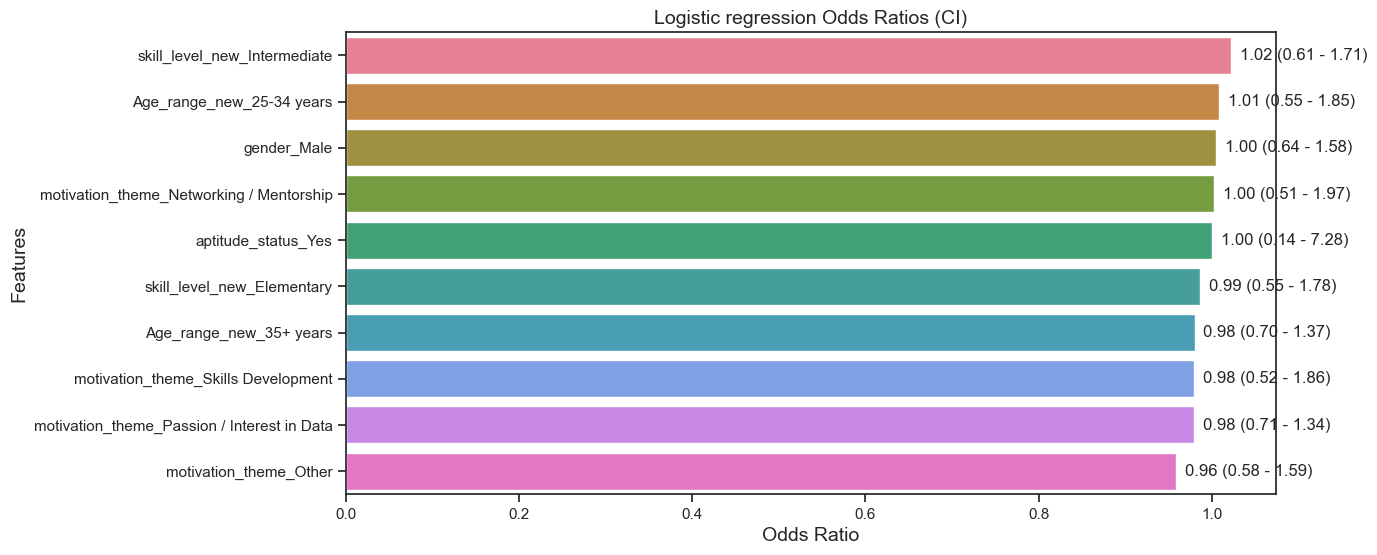

In [48]:
# Setting style
sns.set(style = "ticks")

# Ploting a bar plot with odds ratios
plt.figure(figsize =(12, 6))
ax = sns.barplot(
    y="Feature",
    x="Odds Ratio",
    data = coef_df,
    orient = "h",
    palette = "husl"
)

# Adding odds ratios and CI as texts next to bars
for i, (odds, lower, upper) in enumerate(zip(coef_df["Odds Ratio"],
                                             coef_df["95% CI Lower"],
                                             coef_df["95% CI Upper"])):
  label = f"{odds:.2f} ({lower:.2f} - {upper:.2f})"
  ax.text(odds + 0.01, i, label, ha="left", va="center")

ax.grid(False)

# Adding labels and titles
plt.title("Logistic regression Odds Ratios (CI)", fontsize=14)
plt.xlabel("Odds Ratio", fontsize=14)
plt.ylabel("Features", fontsize=14)

plt.savefig("Odds Ratios (CI) of the features", dpi=300, bbox_inches="tight")

plt.show()

# **DECISION TREE MODEL**

(19,)
Accuracy: 0.74
Optimized Model Performance:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.50      0.20      0.29         5

    accuracy                           0.74        19
   macro avg       0.63      0.56      0.56        19
weighted avg       0.70      0.74      0.69        19

ROC-AUC score: 0.59


Confusion Matrix:
[[13  1]
 [ 4  1]]


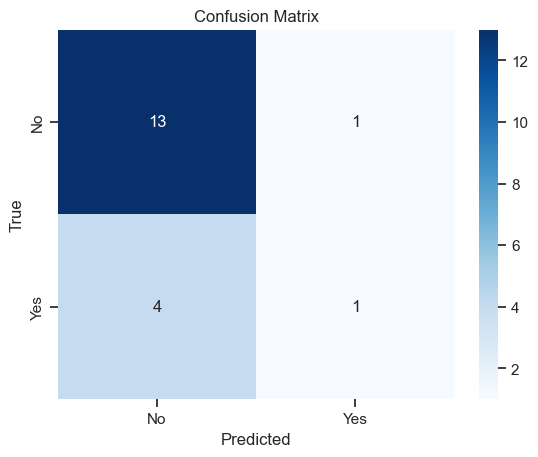

In [49]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Training the Decision tree model
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the model on the training data
dt_model.fit(X1_train, y1_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X1_test)
print(y_pred_dt.shape)
# Probability scores
y_prob_dt = dt_model.predict_proba(X1_test)[:, 1]

# Evaluate accuracy
accuracy = accuracy_score(y1_test, y_pred_dt)
print(f'Accuracy: {accuracy:.2f}')
print("Optimized Model Performance:\n", classification_report(y1_test, y_pred_dt))

auc = roc_auc_score(y1_test, y_prob_dt)
print(f"ROC-AUC score: {auc:.2f}")

# Confusion Matrix
cm_dt = confusion_matrix(y1_test, y_pred_dt)
print(f'Confusion Matrix:\n{cm_dt}')

# Optional: Visualize the confusion matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

#plt.savefig("Confusion matrix dt", dpi=300, bbox_inches="tight")

plt.show()


***The Decision tree model encountered some form of overfitting where it was only predicting the majority class.***

***The Decision tree model achieved fair performance across all the measurement metrics, that is; accuracy score of 68%, precision, recall, F1-score, AUC scores of 53%, 68%, 60%, 47% respectively***

***According to the confusion matrix, out of 14 students, 13 of them where correctly classified as not having graduated and only 1 studdent wrongly classified as having graduated. While among the 5 students who were calssifed as having graduated, all were wrongly classified.***

### ***Fine tuning***

***1. Using the GridSearch Method***

In [50]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [2,3,4,5,6,7,8,9,10,20,30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1,5,10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X1_train, y1_train)


# Get the best parameters and model
best_params = grid_search.best_params_
print("Best max_depth:", grid_search.best_params_["max_depth"]) # getting the best max_depth
print("Best min_samples_split:", grid_search.best_params_['min_samples_split'])
print("Best min_samples_leaf:", grid_search.best_params_['min_samples_leaf'])
best_model = grid_search.best_estimator_
print("Best model:", best_model) # determining the best model

Best max_depth: 2
Best min_samples_split: 20
Best min_samples_leaf: 5
Best model: DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=20)


Best Model Accuracy: 0.74


c:\Users\ekiru\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ekiru\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ekiru\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Optimized Model Performance:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       0.00      0.00      0.00         5

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19

ROC-AUC score: 0.59
Confusion Matrix:
[[14  0]
 [ 5  0]]


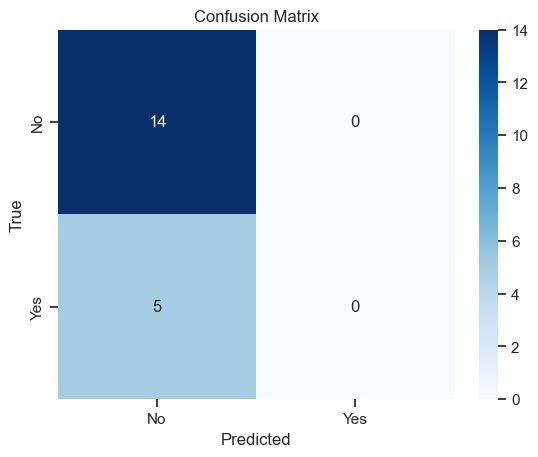

In [51]:

# Predict with the best model
y_pred_best = best_model.predict(X1_test)

# Probability scores
y_prob_best = best_model.predict_proba(X1_test)[:, 1]

# Evaluate the best model
accuracy_best = accuracy_score(y1_test, y_pred_best)
print(f'Best Model Accuracy: {accuracy_best:.2f}')
print("Optimized Model Performance:\n", classification_report(y1_test, y_pred_best))

auc = roc_auc_score(y1_test, y_prob_best)
print(f"ROC-AUC score: {auc:.2f}")

# Confusion Matrix
cm_dt = confusion_matrix(y1_test, y_pred_best)
print(f'Confusion Matrix:\n{cm_dt}')

# Optional: Visualize the confusion matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

#plt.savefig("Confusion matrix dt_grid", dpi=300, bbox_inches="tight")

plt.show()


***The Decision tree model encountered some form of overfitting because it focused on the majority group.***

***The model achieved fair performance across all the measurement metrics, that is; accuracy score of 74%, precision, recall, F1-score, AUC scores of 54%, 74%, 63%, 59% respectively***

***The model perfectly predicted the category of the students that did not graduate perfectly (14 students) with no one being falsely classified. however, it poorly predicted the category of student that graduated (Yes) where it misclassified all the student that graduated as not have graduated.***

### ***SMOTE Method, to handle imbalance***

New class distribution after SMOTE:
 0    34
1    34
Name: count, dtype: int64


Accuracy: 0.68
Optimized Model Performance:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.33      0.20      0.25         5

    accuracy                           0.68        19
   macro avg       0.54      0.53      0.53        19
weighted avg       0.64      0.68      0.66        19

ROC-AUC score: 0.58
Confusion Matrix:
[[12  2]
 [ 4  1]]


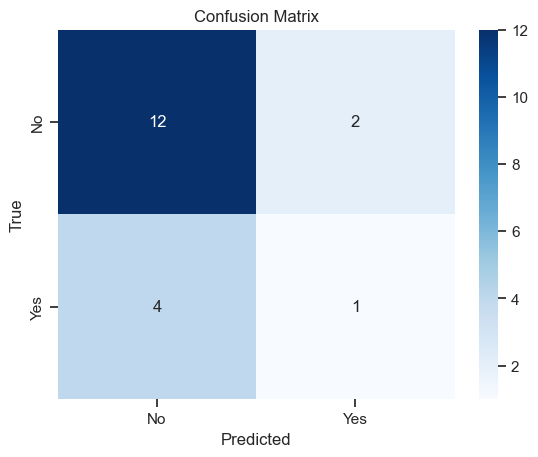

In [52]:
# SMOTE (Synthetic Minority Oversampling technique)
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="auto", random_state=123)

X1_train = X1_train.astype(int)

x_train_resampled, y_train_resampled = smote.fit_resample(X1_train, y1_train)

y_train_resampled = pd.Series(y_train_resampled.values.ravel())

print("New class distribution after SMOTE:\n", y_train_resampled.value_counts())
print("\n")

# min_samples_split=10, min_samples_leaf=5
# Initialize the Decision Tree model
#dt_model_SMOTE = DecisionTreeClassifier(max_depth=3, random_state=123)

# Initialize the Decision Tree model
dt_model_SMOTE = DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=4, random_state=123)
# Train the model on the training data
dt_model_SMOTE.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_dt = dt_model_SMOTE.predict(X1_test)

# Probability scores
y_prob_dt = dt_model_SMOTE.predict_proba(X1_test)[:, 1]

# Evaluate accuracy
accuracy = accuracy_score(y1_test, y_pred_dt)
print(f'Accuracy: {accuracy:.2f}')
print("Optimized Model Performance:\n", classification_report(y1_test, y_pred_dt))

auc = roc_auc_score(y1_test, y_prob_dt)
print(f"ROC-AUC score: {auc:.2f}")

# Confusion Matrix
cm_dt = confusion_matrix(y1_test, y_pred_dt)
print(f'Confusion Matrix:\n{cm_dt}')

# Optional: Visualize the confusion matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

#plt.savefig("Confusion matrix dt_smote", dpi=300, bbox_inches="tight")

plt.show()

***After handling imbalance, the Decision tree model's slightly improved.***

***The model achieved a fairly balanced performance across all the measurement metrics, that is; accuracy 68%, precision 64%, recall 68%, and F1-score 66%, with an AUC of 58%***

***Using the confusion matrix, out of the 14 actual students who were in the category of not having graduated, 12 students were correctly classified as not having graduated and 2 students wrongly classified as having graduated, whereas, Out of 5 actual students, only 1 student was correctly classified as having graduated and 4 were wrongly classified as not having graduated.***

In [53]:

# Converting the boolians into integers
XD_train = x_train_resampled.apply(lambda col: col.astype('int64') if col.dtype == 'bool' else col)

features = XD_train.columns  # Feature names

importances = pd.DataFrame({
    'Feature': features,
    'Importance': dt_model_SMOTE.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)

            Feature  Importance
3  motivation_theme    0.529616
0            gender    0.470384
1   aptitude_status    0.000000
2     Age_range_new    0.000000
4   skill_level_new    0.000000


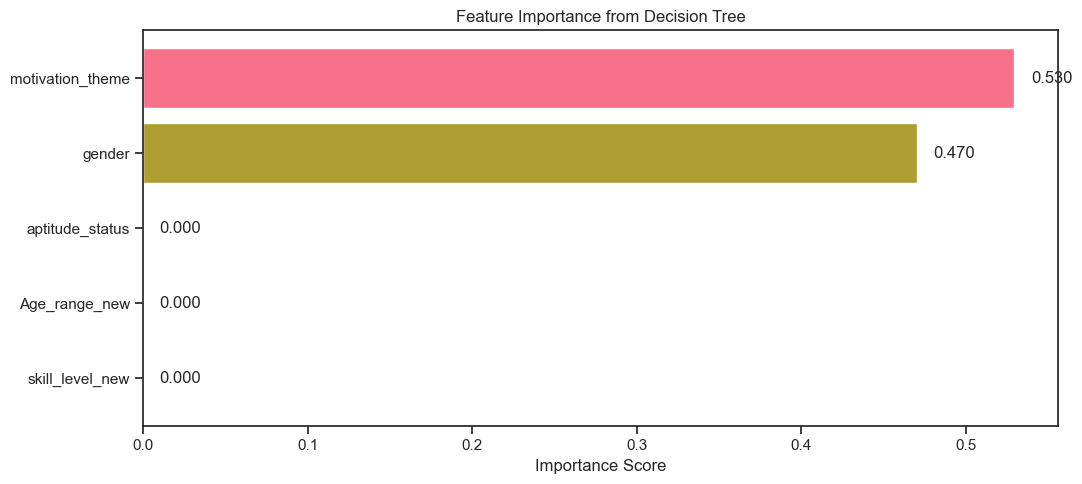

In [54]:
# Set the figure size and style
plt.figure(figsize=(11, 5))
colors = sns.color_palette("husl", len(importances))

# Create horizontal bar plot with unique colors
bars = plt.barh(
    importances['Feature'],
    importances['Importance'],
    color=colors
)

# Add importance values as text labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f"{width:.3f}", va='center')


plt.xlabel("Importance Score")
plt.title("Feature Importance from Decision Tree")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("feature plot_dt", dpi=300, bbox_inches="tight")
plt.show()


## **Model comparision**

#### ***Logistic Regression***
**Accuracy = 68%, precision = 73%, recall = 68%, F1-score = 70%, AUC = 71%**

#### ***Decision tree***
**Accuracy = 68%, precision = 64%, recall = 68%, F1-score = 66%, AUC = 58%**

## Conclusion
**The Logistic regression out performed the Decision Tree, considering the F1-score and the AUC score.**

### **Recommendation**

***Prioritize the applicants motivations, especially those who are interested in skill development, career growth and for jobs.***

***Focus on young professionals (18-34 years)***

***Provide extra support to beginners***
